In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from loader import load_files
from matplotlib.pyplot import figure
from tie import FFTSolver2D

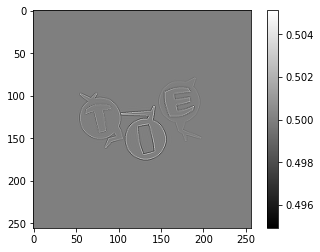

In [54]:
i1_path = '../propagation/propagated_fields/tie_phase/z=1.000.npy'
i2_path = '../propagation/propagated_fields/tie_phase/z=-1.000.npy'
intensities = [np.abs(field) ** 2 for field in load_files([i1_path, i2_path])]
plt.imshow(intensities[0], cmap='gray')
plt.colorbar()
plt.show()

In [55]:
dz = -0.000002  # 2 mkm
px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm
threshold = 0.1

solver = FFTSolver2D(intensities, dz, wavelength, px_size)
retrieved_phase = solver.solve(threshold)
filename = f'tie_phase_dz={dz*1000:.3f}mm.npy'
save_folder = 'retrieved_phases/tie_phase'
save_path = os.path.join(save_folder, filename)
np.save(save_path, retrieved_phase)

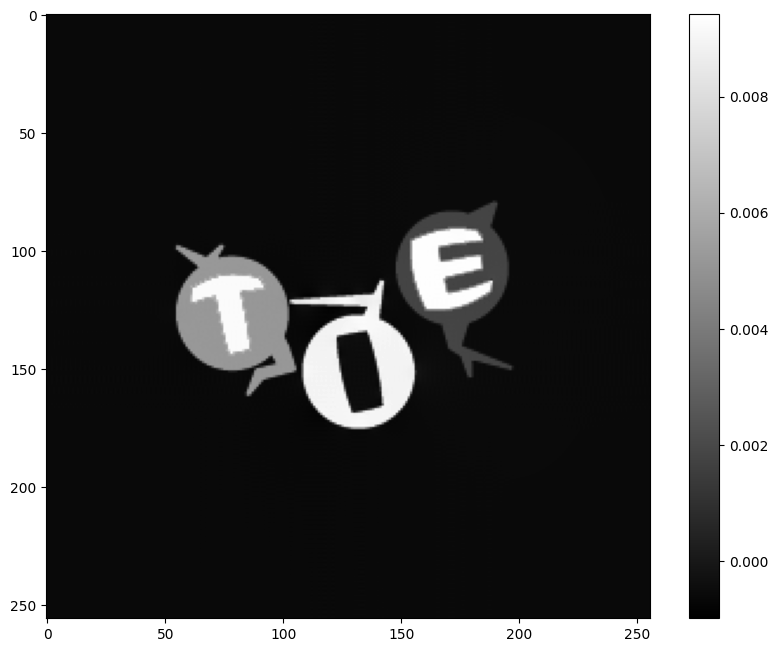

In [56]:
figure(figsize=(10, 8), dpi=100)
plt.imshow(np.load(f'{save_folder}/{filename}'), cmap='gray')
plt.colorbar()
plt.show()